In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

In [57]:

cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=[cancer.feature_names])
X.head()



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [58]:
X['TARGET'] = pd.Series(data=cancer.target)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,TARGET
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [59]:
X.columns

MultiIndex([(            'mean radius',),
            (           'mean texture',),
            (         'mean perimeter',),
            (              'mean area',),
            (        'mean smoothness',),
            (       'mean compactness',),
            (         'mean concavity',),
            (    'mean concave points',),
            (          'mean symmetry',),
            ( 'mean fractal dimension',),
            (           'radius error',),
            (          'texture error',),
            (        'perimeter error',),
            (             'area error',),
            (       'smoothness error',),
            (      'compactness error',),
            (        'concavity error',),
            (   'concave points error',),
            (         'symmetry error',),
            ('fractal dimension error',),
            (           'worst radius',),
            (          'worst texture',),
            (        'worst perimeter',),
            (             'worst a

In [60]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   (mean radius,)              569 non-null    float64
 1   (mean texture,)             569 non-null    float64
 2   (mean perimeter,)           569 non-null    float64
 3   (mean area,)                569 non-null    float64
 4   (mean smoothness,)          569 non-null    float64
 5   (mean compactness,)         569 non-null    float64
 6   (mean concavity,)           569 non-null    float64
 7   (mean concave points,)      569 non-null    float64
 8   (mean symmetry,)            569 non-null    float64
 9   (mean fractal dimension,)   569 non-null    float64
 10  (radius error,)             569 non-null    float64
 11  (texture error,)            569 non-null    float64
 12  (perimeter error,)          569 non-null    float64
 13  (area error,)               569 non

In [61]:
X.shape

(569, 31)

In [62]:
X.isnull().any()

mean radius                False
mean texture               False
mean perimeter             False
mean area                  False
mean smoothness            False
mean compactness           False
mean concavity             False
mean concave points        False
mean symmetry              False
mean fractal dimension     False
radius error               False
texture error              False
perimeter error            False
area error                 False
smoothness error           False
compactness error          False
concavity error            False
concave points error       False
symmetry error             False
fractal dimension error    False
worst radius               False
worst texture              False
worst perimeter            False
worst area                 False
worst smoothness           False
worst compactness          False
worst concavity            False
worst concave points       False
worst symmetry             False
worst fractal dimension    False
TARGET    

Outilier removal

In [63]:
from scipy.stats import zscore
z_scores = zscore(X)
threshold = 3
outliers = (abs(z_scores) > threshold).any(axis=1)
X = X[~outliers]

# Print the number of removed outliers
print(f'Number of outliers removed: {sum(outliers)}')

Number of outliers removed: 74


In [64]:
X.shape

(495, 31)

In [65]:
data = X.iloc[:,:-2]
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.005115,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,...,0.005082,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,0.1794,0.05742,...,0.002179,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063


In [66]:
y = X['TARGET']
y

,TARGET
1,0
2,0
4,0
5,0
6,0
...,...
560,1
563,0
564,0
565,0


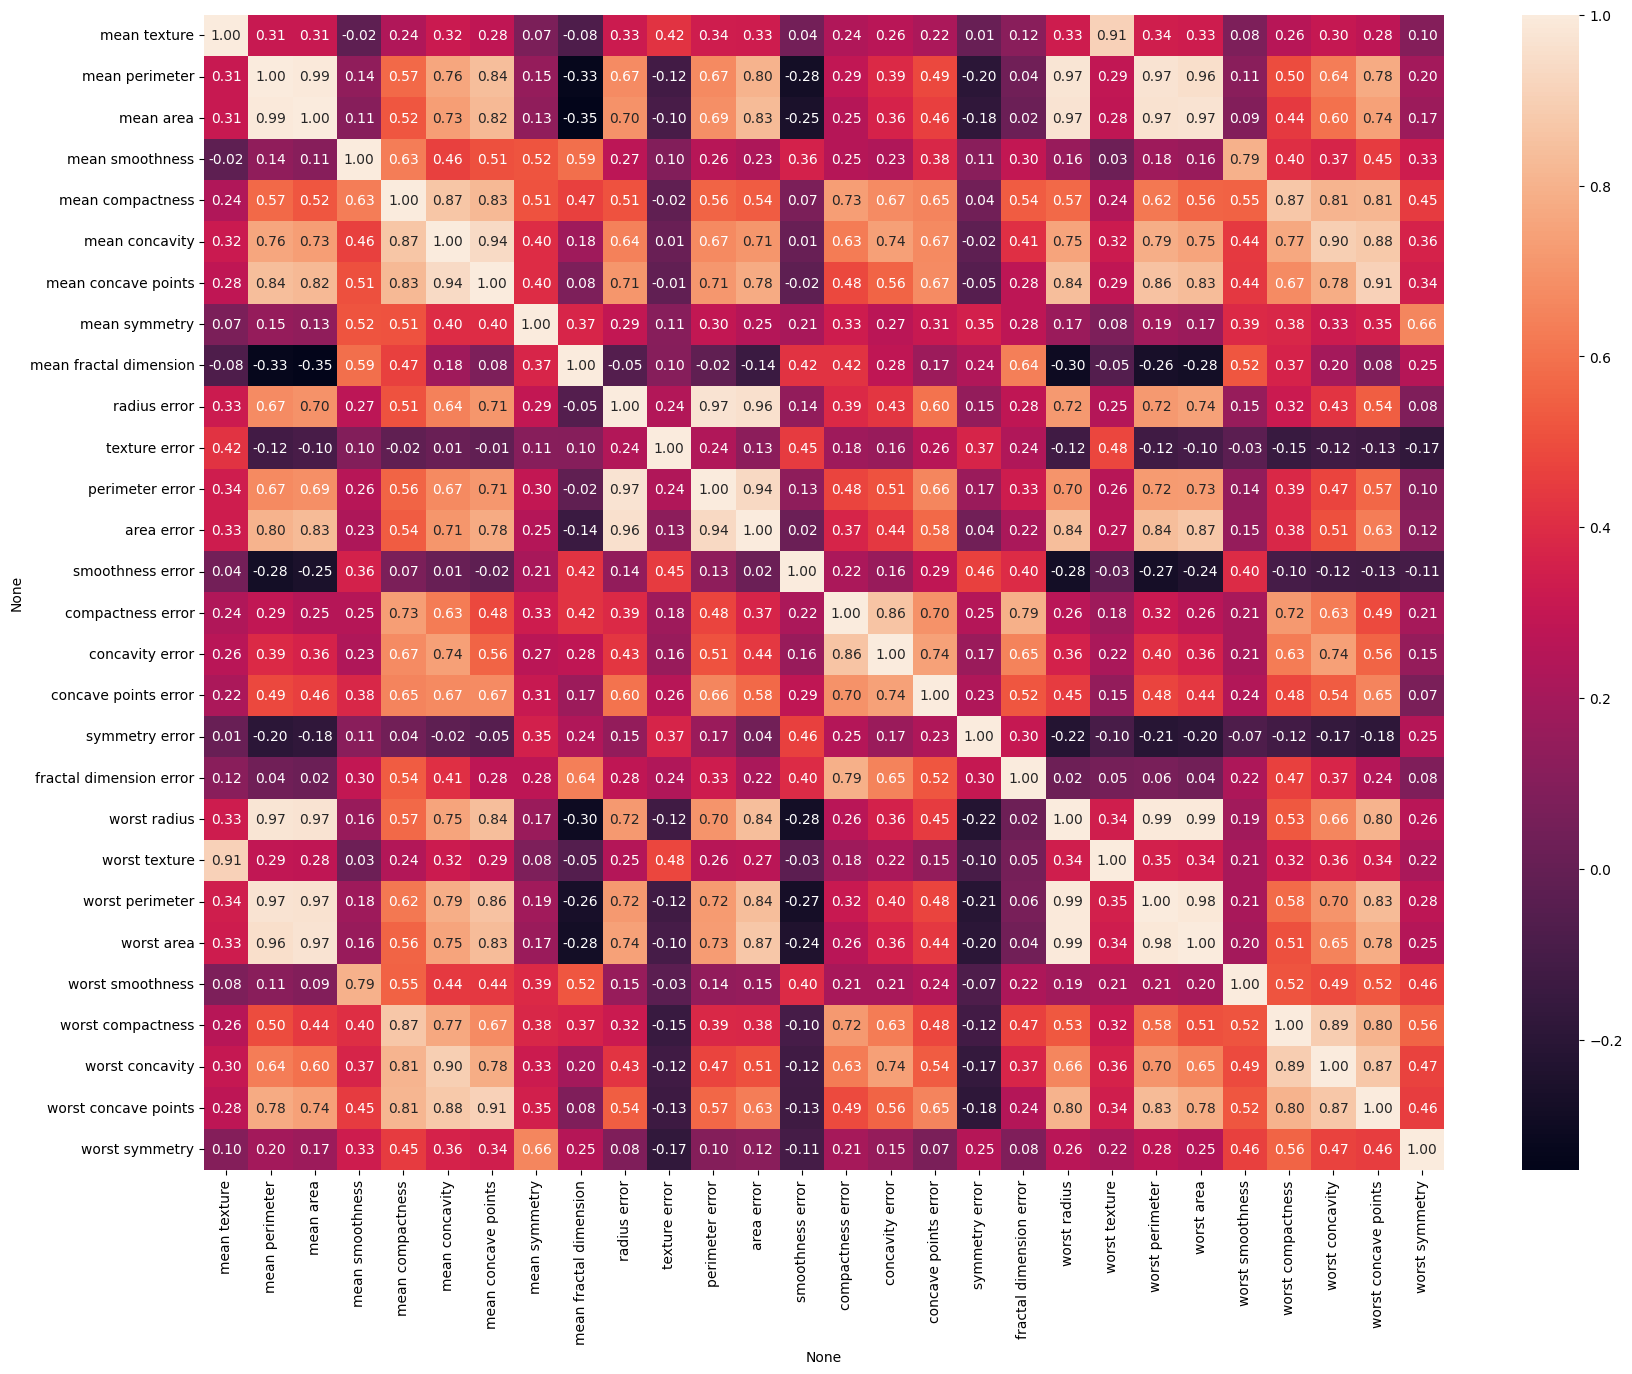

In [67]:
param_list = data.columns
plt.figure(figsize=(20, 15)) 
sns.heatmap(data[param_list[1:]].corr(), annot=True, fmt=".2f")
plt.show() 

Splitting the data

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.25, random_state=42)

In [69]:
X_train.shape

(371, 29)

In [70]:
X_test.shape

(124, 29)

Scaling

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
X_train

array([[-0.34913849, -1.43851335, -0.41172595, ..., -0.91671059,
        -0.92508585, -0.80841115],
       [-0.20468665,  0.31264011, -0.13367256, ...,  1.43655962,
         1.14955889,  1.56911143],
       [-0.32931176, -0.21507235, -0.31739376, ..., -0.7237126 ,
         0.53496977, -0.61934827],
       ...,
       [ 0.04739597, -0.56293662, -0.06529202, ..., -1.23262438,
        -0.68282718, -1.261137  ],
       [-0.04040808,  0.09966199, -0.03151368, ...,  1.08847951,
         0.48944465,  1.26159953],
       [-0.5502381 ,  0.31264011, -0.6040977 , ..., -0.59582424,
        -0.29911546, -0.82948141]])

LOGISTIC REGRESSION 

In [15]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train)
LR_pred = LR.predict(X_test)
LR_pred_train = LR.predict(X_train)

In [16]:
LRtest = accuracy_score(y_test,LR_pred)
LRtrain =  accuracy_score(y_train,LR_pred_train)
print('Testing Accuracy = ', accuracy_score(y_test,LR_pred))
print('Training Accuracy = ', accuracy_score(y_train,LR_pred_train))

Testing Accuracy =  0.9790209790209791
Training Accuracy =  0.9859154929577465


In [17]:
print(classification_report(y_test,LR_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       0.99      0.98      0.98        89

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



LINEAR SVM

In [18]:
from sklearn.svm import SVC
SVC_classifier = SVC(kernel='linear')
SVC_classifier.fit(X_train,y_train)
SVC_y_pred = SVC_classifier.predict(X_test)
SVC_y_predict_train = SVC_classifier.predict(X_train)

In [19]:
LinearSVMtest = accuracy_score(y_test,SVC_y_pred)
LinearSVMtrain = accuracy_score(y_train,SVC_y_predict_train)
print('Testing Accuracy = ', LinearSVMtest)
print('Training Accuracy = ', LinearSVMtrain)

Testing Accuracy =  0.972027972027972
Training Accuracy =  0.9929577464788732


In [20]:
print(classification_report(y_test,SVC_y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        54
           1       0.98      0.98      0.98        89

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



NON LINEAR SVM

In [21]:
NSVC_classifier = SVC(kernel='poly')
NSVC_classifier.fit(X_train,y_train)
NSVC_y_pred = NSVC_classifier.predict(X_test)
NSVC_y_predict_train = NSVC_classifier.predict(X_train)

In [22]:
NonLinearSVMtest = accuracy_score(y_test,NSVC_y_pred)
NonLinearSVMtrain = accuracy_score(y_train,NSVC_y_predict_train)
print('Testing Accuracy = ', NonLinearSVMtest)
print('Training Accuracy = ', NonLinearSVMtrain)

Testing Accuracy =  0.9020979020979021
Training Accuracy =  0.92018779342723


In [23]:
print(classification_report(y_test,NSVC_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.74      0.85        54
           1       0.86      1.00      0.93        89

    accuracy                           0.90       143
   macro avg       0.93      0.87      0.89       143
weighted avg       0.92      0.90      0.90       143



MLP CLASSIFIER

In [24]:
from sklearn.neural_network import MLPClassifier
mlp_classifier = MLPClassifier(
    hidden_layer_sizes=(50, 10), 
    activation='relu',             
    solver='adam',               
    max_iter=1000,               
    random_state=42               
)

mlp_classifier.fit(X_train, y_train)
MLP_y_pred = mlp_classifier.predict(X_test)
MLP_y_predict_train = mlp_classifier.predict(X_train)

In [25]:
MLPtest = accuracy_score(y_test,MLP_y_pred)
MLPtrain = accuracy_score(y_train,MLP_y_predict_train)
print('Testing Accuracy = ', MLPtest)
print('Training Accuracy = ', MLPtrain)

Testing Accuracy =  0.972027972027972
Training Accuracy =  0.9976525821596244


In [26]:
print(classification_report(y_test,MLP_y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        54
           1       0.99      0.97      0.98        89

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



DECISION TREE CLASSIFIER

In [27]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(max_depth=3,splitter='best',criterion='gini')
DTC.fit(X_train,y_train)
d_y_predict = DTC.predict(X_test)
d_y_predict_train = DTC.predict(X_train)

In [28]:
DTCtest = accuracy_score(y_test,d_y_predict)
DTCtrain = accuracy_score(y_train,d_y_predict_train)
print('Testing Accuracy = ', DTCtest)
print('Training Accuracy = ', DTCtrain)

Testing Accuracy =  0.958041958041958
Training Accuracy =  0.971830985915493


In [29]:
print(classification_report(y_test,d_y_predict))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        54
           1       0.97      0.97      0.97        89

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



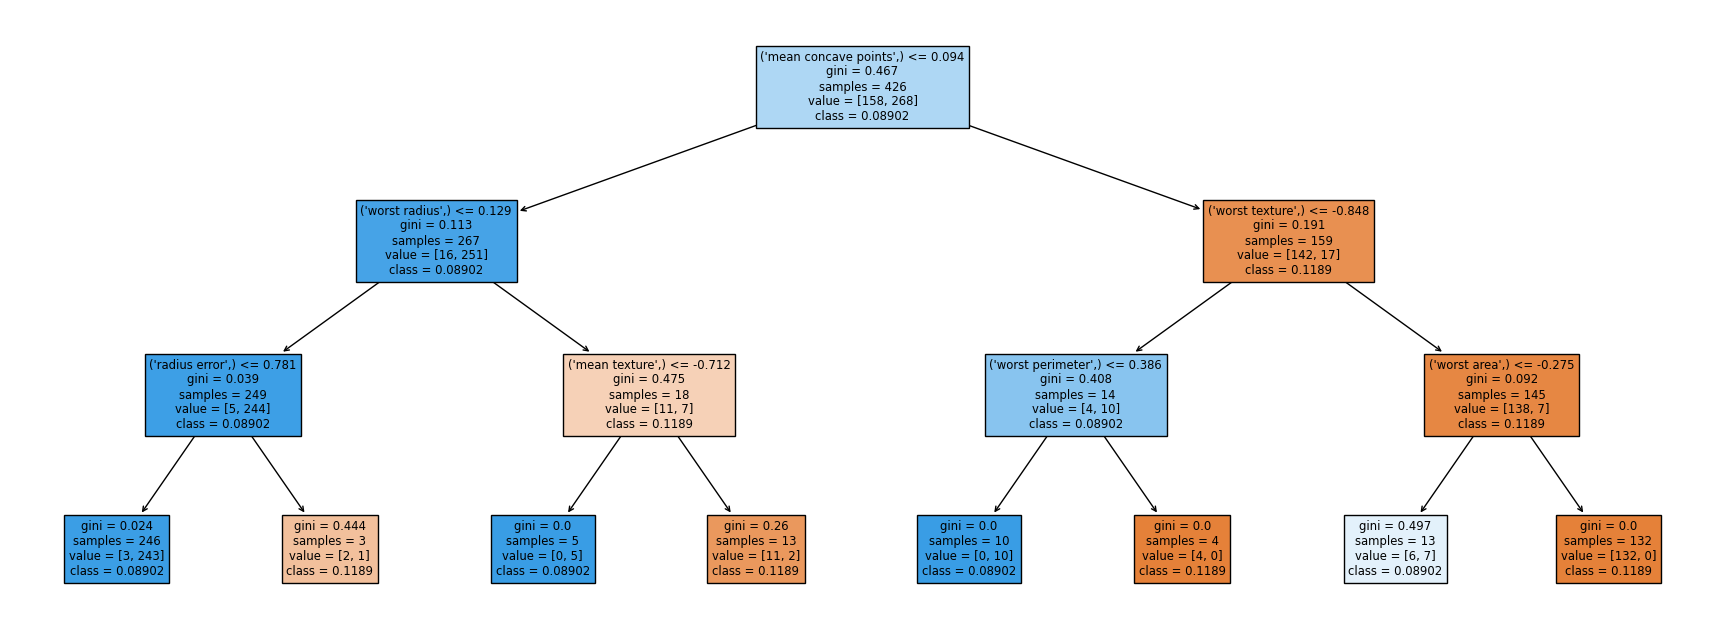

In [30]:
from sklearn.tree import plot_tree
feature_names = list(data.columns[:-1]) 
class_names = [str(class_name) for class_name in data[data.columns[-1]].unique()]
plt.figure(figsize=(22, 8))
plot_tree(DTC, filled=True, feature_names=feature_names, class_names=class_names)
plt.show()

RANDOM FOREST

In [31]:
from sklearn.ensemble import RandomForestClassifier
Randomforest =RandomForestClassifier(criterion= 'gini', max_depth = 3)
Randomforest.fit(X_train,y_train)
r_y_predict = Randomforest.predict(X_test)
r_y_predict_train = Randomforest.predict(X_train)

In [32]:
RandomForesttest = accuracy_score(y_test,r_y_predict)
RandomForesttrain = accuracy_score(y_train,r_y_predict_train)
print('Testing Accuracy = ', RandomForesttest)
print('Training Accuracy = ', RandomForesttrain)

Testing Accuracy =  0.965034965034965
Training Accuracy =  0.9765258215962441


In [33]:
print(classification_report(y_test,r_y_predict))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        54
           1       0.97      0.98      0.97        89

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



ADABOOST CLASSIFIER

In [34]:
# Import the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=10, learning_rate=1)
AdaBoost = abc.fit(X_train, y_train)
y_pred = AdaBoost.predict(X_test)
y_pred_train = AdaBoost.predict(X_train)

In [35]:
Adaboosttest = accuracy_score(y_test,y_pred)
Adaboosttrain =  accuracy_score(y_train,y_pred_train)
print('Testing Accuracy = ', Adaboosttest)
print('Training Accuracy = ', Adaboosttrain)

Testing Accuracy =  0.9440559440559441
Training Accuracy =  0.9882629107981221


In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93        54
           1       0.97      0.94      0.95        89

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



K Means

In [37]:
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from sklearn.metrics import silhouette_score

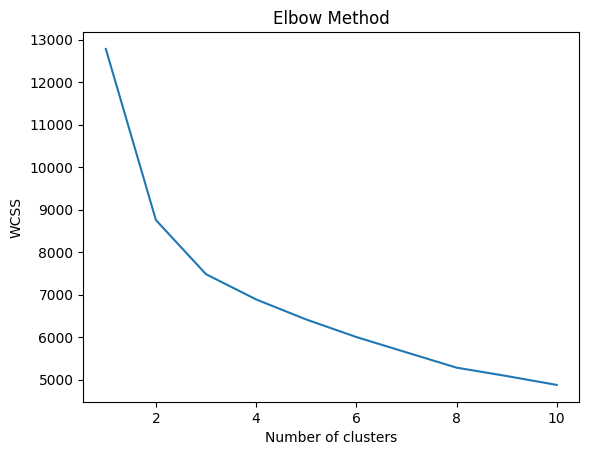

In [38]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [39]:
model = KMeans(n_clusters=3, n_init="auto")
model.fit(X_train)

KMeans(n_clusters=3, n_init='auto')

In [40]:
silhouette_avg1 = silhouette_score(X_train, model.labels_)
print(f'Silhouette Score: {silhouette_avg1}')

Silhouette Score: 0.3202619118053612


Principal Component Analysis

Text(0, 0.5, 'cumulative explained variance')

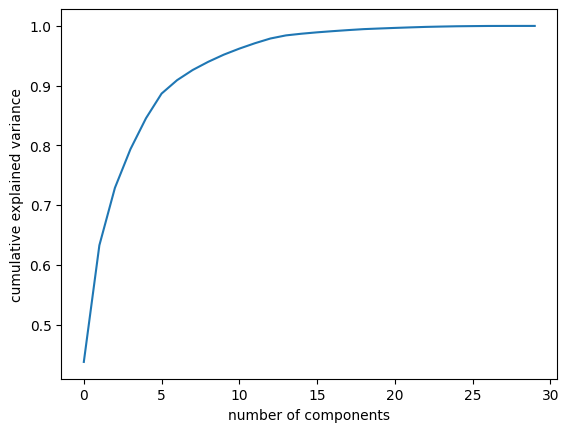

In [41]:
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [42]:
pca = PCA(n_components=10)
pca.fit(X_train)
data_pca = pca.transform(X_train)

In [43]:
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-4.307702,-1.878763,-0.096336,-1.788554,1.707234,0.541122,0.167312,0.537814,0.324546,-0.256925
1,2.370195,2.003231,-2.412576,0.363958,-0.468697,-0.138808,0.582370,-0.641868,-0.575915,-0.009327
2,-1.928674,-0.229950,0.699843,0.469417,1.078276,2.370342,0.272698,-0.064284,-0.016542,0.046921
3,3.373326,-1.657578,-1.951035,2.376400,1.024938,-0.902455,-0.231240,-0.030687,-0.050130,-0.287160
4,4.897018,-3.028985,2.573167,-0.015154,0.186734,0.931497,-1.394939,0.296776,-0.510443,-1.357816


In [44]:
model = KMeans(n_clusters=3, n_init="auto")
model.fit(data_pca)

KMeans(n_clusters=3, n_init='auto')

In [45]:
silhouette_avg2 = silhouette_score(data_pca, model.labels_)
print(f'Silhouette Score: {silhouette_avg2}')

Silhouette Score: 0.33288310268855653


In [46]:
from tabulate import tabulate
result = [
    ["Logistic Regression", LRtest, LRtrain],
    ["Linear SVM", LinearSVMtest, LinearSVMtrain],
    ["Non-Linear SVM", NonLinearSVMtest, NonLinearSVMtrain],
    ["MLP", MLPtest, MLPtrain],
    ["Decision Tree", DTCtest, DTCtrain],
    ["Random Forest", RandomForesttest, RandomForesttrain],
    ["Adaboost", Adaboosttest, Adaboosttrain],
]

# Create the table
table = tabulate(result, headers=["Classifier", "Test Accuracy", "Train Accuracy"], tablefmt="pretty")

# Print the table
print(table)

+---------------------+--------------------+--------------------+
|     Classifier      |   Test Accuracy    |   Train Accuracy   |
+---------------------+--------------------+--------------------+
| Logistic Regression | 0.9790209790209791 | 0.9859154929577465 |
|     Linear SVM      | 0.972027972027972  | 0.9929577464788732 |
|   Non-Linear SVM    | 0.9020979020979021 |  0.92018779342723  |
|         MLP         | 0.972027972027972  | 0.9976525821596244 |
|    Decision Tree    | 0.958041958041958  | 0.971830985915493  |
|    Random Forest    | 0.965034965034965  | 0.9765258215962441 |
|      Adaboost       | 0.9440559440559441 | 0.9882629107981221 |
+---------------------+--------------------+--------------------+


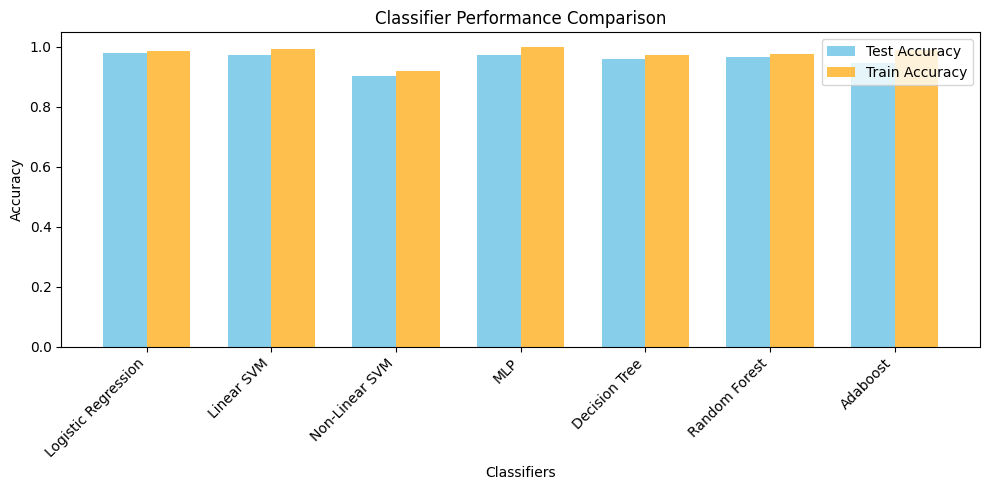

In [47]:
classifiers = ["Logistic Regression", "Linear SVM", "Non-Linear SVM", "MLP", "Decision Tree", "Random Forest", "Adaboost"]
test_accuracies = [LRtest, LinearSVMtest, NonLinearSVMtest, MLPtest, DTCtest, RandomForesttest, Adaboosttest]
train_accuracies = [LRtrain, LinearSVMtrain, NonLinearSVMtrain, MLPtrain, DTCtrain, RandomForesttrain, Adaboosttrain]

bar_width = 0.35
index = np.arange(len(classifiers))

plt.figure(figsize=(10, 5))

plt.bar(index, test_accuracies, bar_width, color='skyblue', label='Test Accuracy')
plt.bar(index + bar_width, train_accuracies, bar_width, color='orange', label='Train Accuracy', alpha=0.7)

plt.title('Classifier Performance Comparison')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(index + bar_width / 2, classifiers, rotation=45, ha='right')
plt.tight_layout()

plt.show()


Agglomerative Clustering 

In [48]:
x = pd.DataFrame(X_train)

In [49]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

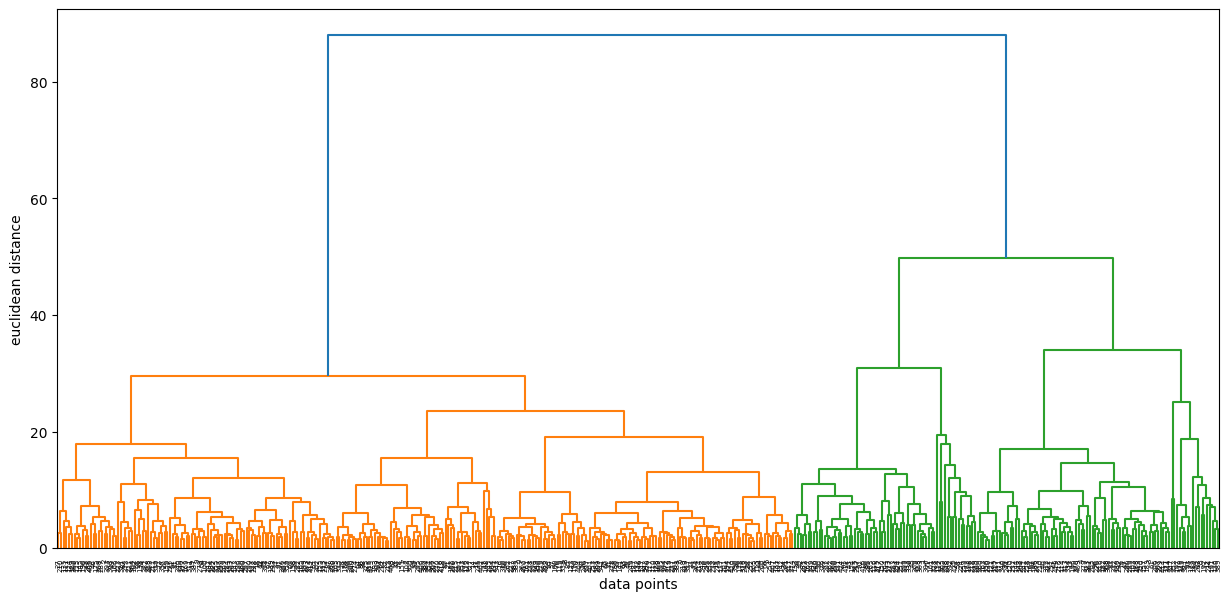

In [50]:
plt.figure(figsize = (15,7))
from scipy.cluster.hierarchy import linkage,dendrogram
merg = linkage(x, method = "ward")
dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [51]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = "euclidean", linkage = "ward")
cluster = hc.fit_predict(x)
x["label"] = cluster

In [52]:
x.label.value_counts()

1    270
0    156
Name: label, dtype: int64

In [53]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,label
0,-0.349138,-1.438513,-0.411726,-0.390479,-1.863662,-1.268607,-0.826171,-0.952866,-1.729368,-0.941541,...,-1.655655,-0.589864,-0.525560,-1.510669,-0.891500,-0.750217,-0.916711,-0.925086,-0.808411,1
1,-0.204687,0.312640,-0.133673,-0.275880,1.078073,0.863546,0.726314,0.898441,1.178770,1.474377,...,0.689899,0.194128,-0.051934,1.129415,0.923942,1.222217,1.436560,1.149559,1.569111,0
2,-0.329312,-0.215072,-0.317394,-0.364357,-1.579880,-0.457451,-0.597310,-0.764588,0.275343,-0.501024,...,-0.148985,-0.320159,-0.446032,-1.634396,-0.106752,-0.539891,-0.723713,0.534970,-0.619348,1
3,1.027403,2.089824,1.046922,0.917584,0.316303,0.562037,1.048527,0.930437,-0.325697,-0.477474,...,2.165006,1.165793,0.997696,0.383604,0.860948,1.872819,1.310691,0.152884,0.421636,0
4,1.828969,0.696001,1.763681,1.783821,-0.333674,0.628175,0.974660,1.265740,-0.131572,-1.713139,...,0.387568,1.556276,1.385595,-0.577759,0.296680,0.595768,1.232995,0.050452,-1.406351,0


In [54]:
silhouette_avg_agglo = silhouette_score(x, hc.labels_)
print(f'Silhouette Score: {silhouette_avg_agglo}')

Silhouette Score: 0.3326403074556428
